In [47]:
using Revise
using Bilevel

using RigidBodyDynamics
using ForwardDiff
using Plots

In [48]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)

floor = findbody(mechanism, "floor")
point = Point3D(default_frame(floor), [0.,0.,0.])
normal = FreeVector3D(default_frame(floor), [0.,0.,1.])
floor_obs = Obstacle(floor, point, normal, :xyz, .5)

obstacles = [floor_obs]
env = Environment(mechanism, urdf, obstacles)
ctrl! = (u,t,x) -> u[:] .= 0.
x0 = MechanismState(mechanism)

MechanismState{Float64, Float64, Float64, …}(…)

In [49]:
q0 = [1., 0., 0., 0., 0., 0., 0.015]
v0 = [0., 0., 0., 1., 0., 0.]
N = 25
Δt = .01

sim_data = get_sim_data_indirect(mechanism,env,Δt,relax_comp=false)
set_configuration!(x0, q0)
set_velocity!(x0, v0)

In [ ]:
traj = Bilevel.simulate(sim_data, ctrl!, x0, N, verbose=1)
traj_t = vcat(0.,cumsum([Δt for i in 1:N]));
traj_q = [traj[sim_data.vs(:qnext),i] for i in 1:N+1];

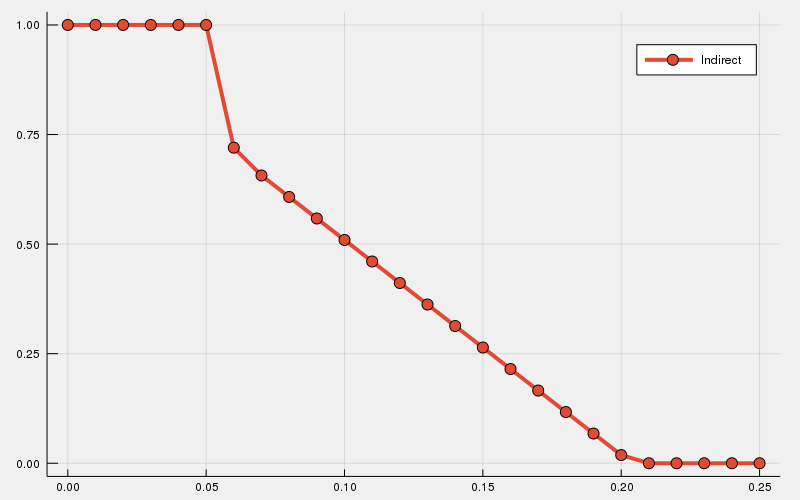

In [46]:
j = 11
clibrary(:Plots)
gr(size=(800,500), html_output_format=:png, 
    seriescolor=:magma,  background_color_legend=:white, 
    background=RGB(((240,240,240) ./ 255.)...));
plot(traj_t,traj[j,:],label="Indirect",seriescolor=RGB(((227,74,51) ./ 255.)...),linewidth=4,marker=6)
# plot!(traj_bi_t,traj_bi[j,:],label="Bilevel Solver",seriescolor=RGB(((254,232,200) ./ 255.)...),linewidth=0,marker=4)